**PILAR ARIAS VAZQUEZ, ÁLVARO GARCÍA CID, YEDRA MARTÍN OLMOS, AMAYA SARASA COLINA**

**<GRUPO 7>**

# IMPORTAMOS LIBRERÍAS Y DATOS

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
assert train_images.shape == (60000,28,28)
assert test_images.shape == (10000,28,28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


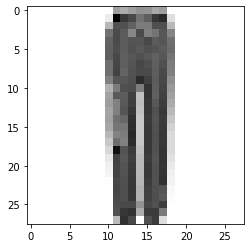

In [5]:
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
train_labels = train_labels.reshape((60000,1))
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255
test_labels = test_labels.reshape((10000,1))

In [7]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


# CASOS

## CASO 1.1

In [8]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [9]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
history1=model.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 14s 4ms/step - loss: 1.0048 - accuracy: 0.6549 - val_loss: 0.6726 - val_accuracy: 0.7521
Epoch 2/5
960/960 [==============================] - 3s 3ms/step - loss: 0.6126 - accuracy: 0.7774 - val_loss: 0.5618 - val_accuracy: 0.7997
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5344 - accuracy: 0.8083 - val_loss: 0.5286 - val_accuracy: 0.8067
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4853 - accuracy: 0.8276 - val_loss: 0.4698 - val_accuracy: 0.8323
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4536 - accuracy: 0.8395 - val_loss: 0.4526 - val_accuracy: 0.8388


In [11]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [12]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

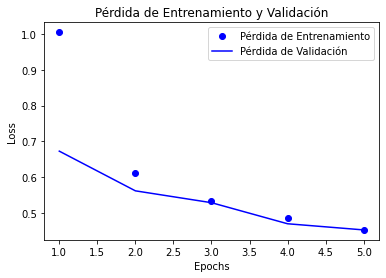

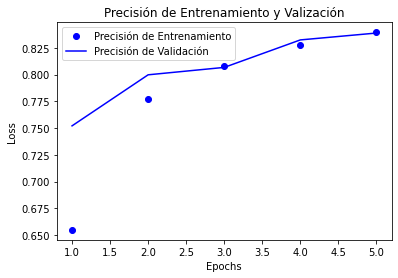

In [13]:
pinta_perdida_entrenamiento_validacion(history1)
pinta_precision_entrenamiento_validacion(history1)

## CASO 1.2

In [14]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [15]:
model12.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [16]:
history12=model12.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0074 - accuracy: 0.6508 - val_loss: 0.6761 - val_accuracy: 0.7492
Epoch 2/25
960/960 [==============================] - 3s 3ms/step - loss: 0.6044 - accuracy: 0.7788 - val_loss: 0.5535 - val_accuracy: 0.7965
Epoch 3/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5232 - accuracy: 0.8118 - val_loss: 0.5035 - val_accuracy: 0.8217
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4798 - accuracy: 0.8303 - val_loss: 0.4756 - val_accuracy: 0.8318
Epoch 5/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4477 - accuracy: 0.8415 - val_loss: 0.4366 - val_accuracy: 0.8466
Epoch 6/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4230 - accuracy: 0.8506 - val_loss: 0.4254 - val_accuracy: 0.8499
Epoch 7/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4065 - accuracy: 0.8574 - val_loss: 0.4064 - val_accuracy: 0.8536
Epoch 

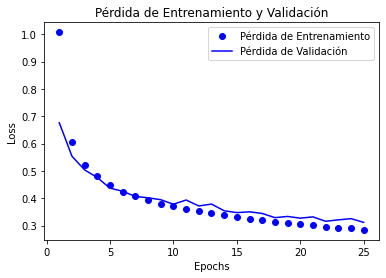

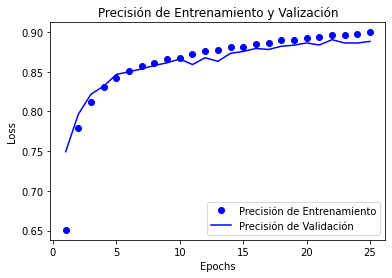

In [17]:
pinta_perdida_entrenamiento_validacion(history12)
pinta_precision_entrenamiento_validacion(history12)

A medida que van avanzando las épocas, se puede observar cómo va 

## CASO 1.3

In [18]:
model13 = Sequential()
model13.add(Conv2D(32, (5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))
model13.add(MaxPooling2D((2, 2)))

model13.add(Conv2D(64, (5, 5), strides=(1, 1), activation='tanh'))
model13.add(MaxPooling2D((2, 2)))

model13.add(Flatten())
model13.add(Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [19]:
model13.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
history13=model13.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.9531 - accuracy: 0.6816 - val_loss: 0.6381 - val_accuracy: 0.7564
Epoch 2/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5860 - accuracy: 0.7848 - val_loss: 0.5356 - val_accuracy: 0.8023
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5121 - accuracy: 0.8147 - val_loss: 0.4936 - val_accuracy: 0.8177
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4695 - accuracy: 0.8331 - val_loss: 0.4553 - val_accuracy: 0.8369
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4415 - accuracy: 0.8434 - val_loss: 0.4341 - val_accuracy: 0.8454


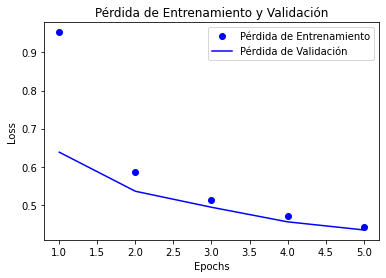

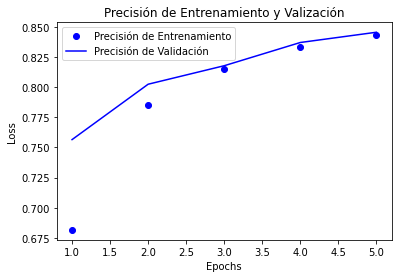

In [21]:
pinta_perdida_entrenamiento_validacion(history13)
pinta_precision_entrenamiento_validacion(history13)

Comparando con el caso 1.1, es decir, con la función de activación ReLU, se puede apreciar que en la primera época, se alcanza más precisión y menos pérdida, que con la función de activación tanh (caso 1.3). ReLU tiende a tener más función de pérdida a lo largo de las 5 épocas, sin embargo, a partir de la primera época, se aprecia más precisión. 

Por lo que al final de las 5 épocas, encontramos menos pérdida en tanh, pero más precisión en ReLU.
Efectivamente, esto se puede comprobar gracias a las gráficas que se han realizado anteriormente en cada caso. 

Comparando enconjunto podemos ver como el caso 1.2 en el que se realiza un mayor número de épocas, no se produce sobre entrenamiento sino que obtenemos unos valores mejores de precisión y pérdida que en los casos 1.1 y 1.3

Por lo tanto para este tipo de modelo es mejor emplear un número mayor de 5 épocas para entrenar.




## CASO 2.1

In [22]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

In [23]:
model2.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [24]:
history2=model2.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.9366 - accuracy: 0.6670 - val_loss: 0.6911 - val_accuracy: 0.7310
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 0.5819 - accuracy: 0.7861 - val_loss: 0.5456 - val_accuracy: 0.8075
Epoch 3/5
960/960 [==============================] - 5s 5ms/step - loss: 0.5018 - accuracy: 0.8176 - val_loss: 0.4649 - val_accuracy: 0.8365
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4544 - accuracy: 0.8373 - val_loss: 0.4599 - val_accuracy: 0.8319
Epoch 5/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4242 - accuracy: 0.8483 - val_loss: 0.4397 - val_accuracy: 0.8456


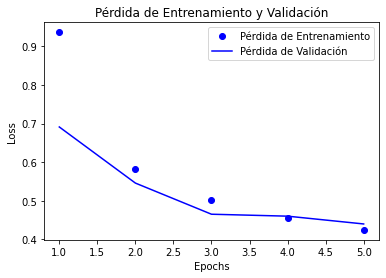

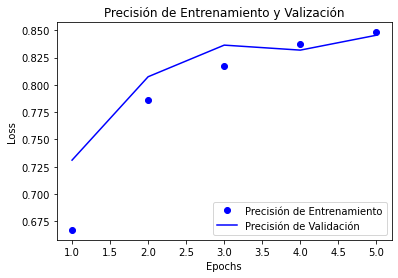

In [25]:
pinta_perdida_entrenamiento_validacion(history2)
pinta_precision_entrenamiento_validacion(history2)

## CASO 2.2

In [26]:
model22 = Sequential()
model22.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28, 28, 1)))
model22.add(MaxPooling2D((2, 2)))

model22.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model22.add(MaxPooling2D((2, 2)))

model22.add(Flatten())
model22.add(Dense(65,activation='relu'))
model22.add(Dense(10, activation='softmax'))
model22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

In [27]:
model22.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [28]:
history22=model22.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 0.9488 - accuracy: 0.6684 - val_loss: 0.6098 - val_accuracy: 0.7771
Epoch 2/25
960/960 [==============================] - 5s 6ms/step - loss: 0.5923 - accuracy: 0.7829 - val_loss: 0.5496 - val_accuracy: 0.7983
Epoch 3/25
960/960 [==============================] - 5s 5ms/step - loss: 0.5089 - accuracy: 0.8142 - val_loss: 0.4993 - val_accuracy: 0.8190
Epoch 4/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4580 - accuracy: 0.8357 - val_loss: 0.4618 - val_accuracy: 0.8317
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4208 - accuracy: 0.8487 - val_loss: 0.4410 - val_accuracy: 0.8352
Epoch 6/25
960/960 [==============================] - 5s 5ms/step - loss: 0.3951 - accuracy: 0.8588 - val_loss: 0.4150 - val_accuracy: 0.8561
Epoch 7/25
960/960 [==============================] - 5s 5ms/step - loss: 0.3782 - accuracy: 0.8645 - val_loss: 0.3997 - val_accuracy: 0.8541
Epoch 

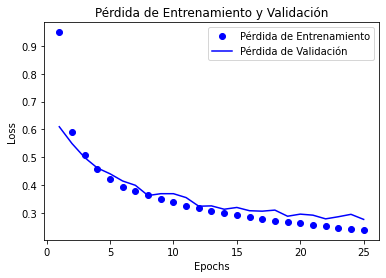

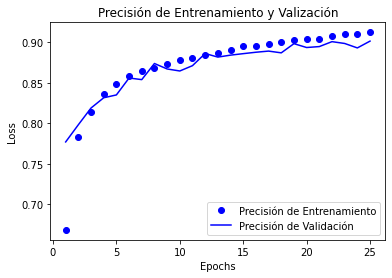

In [29]:
pinta_perdida_entrenamiento_validacion(history22)
pinta_precision_entrenamiento_validacion(history22)

Al igual que ocurría en el caso 1, en el caso 2 podemos comprobar que el modelo 2.2, en el cual empleamos 25 épocas para entrenar, no se sobre entrena por lo que obtenemos mejores datos de precisión y pérdida que en el caso 2.1

## CASO 3.1

In [30]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 65)               

In [31]:
model3.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [32]:
history3=model3.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 5ms/step - loss: 0.4512 - accuracy: 0.8379 - val_loss: 0.3503 - val_accuracy: 0.8716
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2932 - accuracy: 0.8931 - val_loss: 0.2840 - val_accuracy: 0.8948
Epoch 3/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2461 - accuracy: 0.9084 - val_loss: 0.2631 - val_accuracy: 0.9046
Epoch 4/5
960/960 [==============================] - 5s 5ms/step - loss: 0.2172 - accuracy: 0.9191 - val_loss: 0.2538 - val_accuracy: 0.9075
Epoch 5/5
960/960 [==============================] - 5s 5ms/step - loss: 0.1906 - accuracy: 0.9292 - val_loss: 0.2279 - val_accuracy: 0.9171


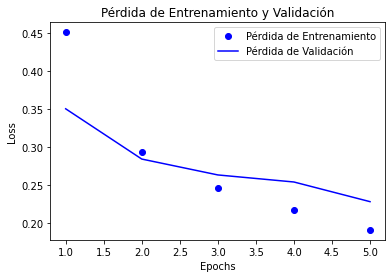

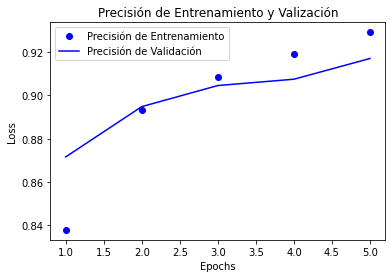

In [33]:
pinta_perdida_entrenamiento_validacion(history3)
pinta_precision_entrenamiento_validacion(history3)

## CASO 3.2

In [34]:
model32 = Sequential()
model32.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same', input_shape=(28,28,1)))
model32.add(MaxPooling2D((2, 2)))

model32.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model32.add(MaxPooling2D((2, 2)))

model32.add(Flatten())
model32.add(Dense(65,activation='relu'))
model32.add(Dense(10, activation='softmax'))
model32.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [35]:
model32.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [36]:
history32=model32.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 5s 5ms/step - loss: 0.4558 - accuracy: 0.8370 - val_loss: 0.3687 - val_accuracy: 0.8718
Epoch 2/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2987 - accuracy: 0.8912 - val_loss: 0.2751 - val_accuracy: 0.9009
Epoch 3/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2517 - accuracy: 0.9080 - val_loss: 0.2595 - val_accuracy: 0.9039
Epoch 4/25
960/960 [==============================] - 5s 5ms/step - loss: 0.2208 - accuracy: 0.9182 - val_loss: 0.2589 - val_accuracy: 0.9068
Epoch 5/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1954 - accuracy: 0.9271 - val_loss: 0.2278 - val_accuracy: 0.9136
Epoch 6/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1705 - accuracy: 0.9358 - val_loss: 0.2470 - val_accuracy: 0.9153
Epoch 7/25
960/960 [==============================] - 5s 5ms/step - loss: 0.1509 - accuracy: 0.9423 - val_loss: 0.2444 - val_accuracy: 0.9158
Epoch 

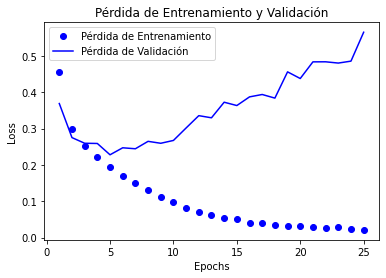

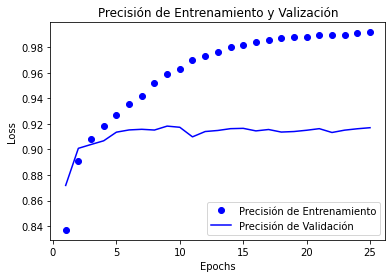

In [37]:
pinta_perdida_entrenamiento_validacion(history32)
pinta_precision_entrenamiento_validacion(history32)

En este caso podemos ver que el modelo más adecuado es el 3.1 ya que viendo el comportamiento del modelo 3.2 podemos apreciar que el modelo se sobre entrena cuando pasamos las 5 épocas

# ANÁLISIS MODEL.SUMMARY()


Se analizarán los 3 casos teniendo en cuenta que el stride que se utiliza es 1.

  ## CASO 1
  **1ª capa convolucional:**

  - Conv2d:

      (5x5 de matriz W + 1 del bias) x 32 filtros = *832 parámetros*

  - MaxPooling2D:

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2D_1:

      (5x5 de matriz W x 32 filtros anteriores + 1 del bias) x 64 filtros = *51 264 parámetros*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.
  - Dense

      El número de parámteros de la capa soft-max es 10 x 1024 + 10 = *10250 parámetros*

**Parámetros totales**

  *832* de la 1ª capa convolucional + *51264* de la 2ª capa convolucional + *10250* de la capa dense = *62,346* parámetros entrenables. 


  ## CASO 2
  La principal diferencia entre este caso 2 y el caso 1 es que el tamaño de las matrices se mantiene tras pasar por las capas Conv2d ya que introducimos el padding, que consiste en rellenar con 0 para matener el tamaño de la matriz.

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

  **2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es (6272 reuronas tras el flatten + 1 del bias) x 65 neuronas dela capa = *407745 parámetros*

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*



  **Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *407745* de la 1ª capa dense + 660 de la 2ª capa dense = *485461 parámetros.*


  ## CASO 3
  La principal diferencia entre este caso 3 y el caso 1 es que el tamaño de las matrices se mantiene tras pasar por las capas Conv2d ya que introducimos el padding, que consiste en rellenar con 0 para matener el tamaño de la matriz.

  **1ª capa convolucional:**

  - Conv2d: 
    
      (7x7 de matriz W + 1 del bias) x 64 filtros = *3200 parámetros*

  - MaxPooling2D: 

      0, no se hace uso de parámetros.

**2ª capa convolucional**

  - Conv2d: 

      (3x3 de matriz W x 64 filtros anteriores + 1 del bias) x 128 filtros = *73 856 parámetros.*

  - MaxPooling2D_1:

      0, no se hace uso de parámetros.

  - Flatten

      0, no se hace uso de parámetros.

  - Dense_1

      El número de parámetros de la capa ReLU es (6272 reuronas tras el flatten + 1 del bias) x 65 neuronas dela capa = *407745 parámetros*

  - Dense_2

      El número de parámetros de la capa soft-max es 10 x 65 + 10 = *660 parámetros.*

**Parámetros totales**

  *3200* de la 1ª capa convolucional + *73856* de la 2ª capa convolucional + *407745* de la 1ª capa dense + 660 de la 2ª capa dense = *485461 parámetros.*

# ANÁLISIS RESULTADOS

In [38]:
predictions = model.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [40]:
test_labels=test_labels.reshape(10000,)

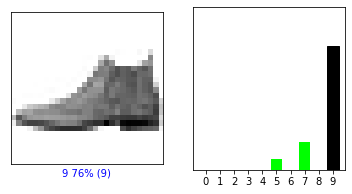

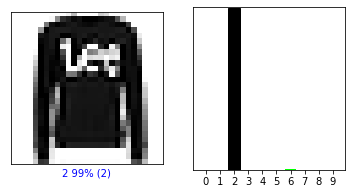

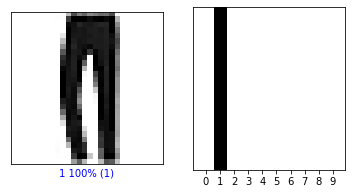

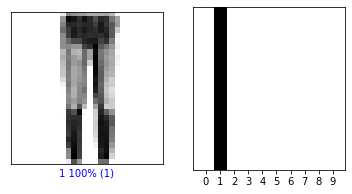

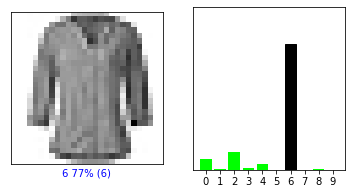

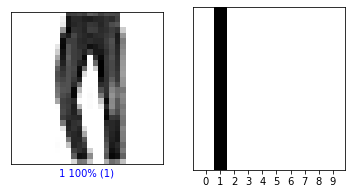

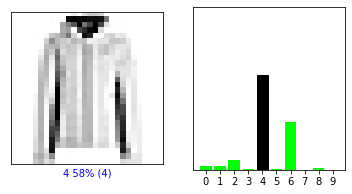

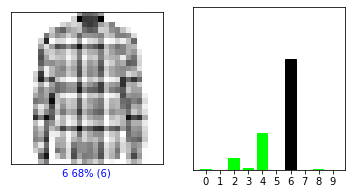

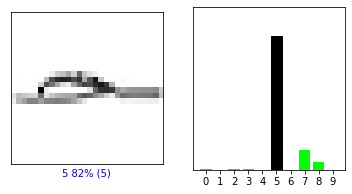

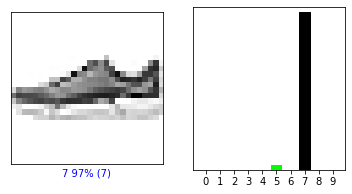

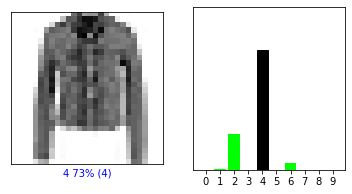

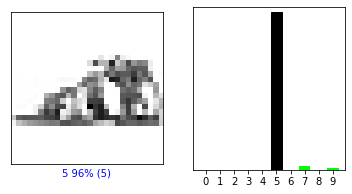

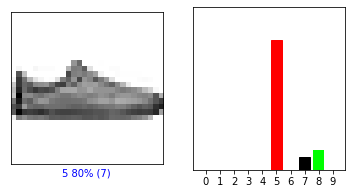

In [41]:
i = 0
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions[j], test_labels)
  plt.show()

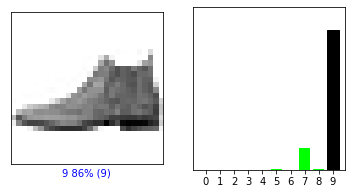

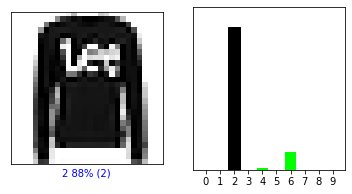

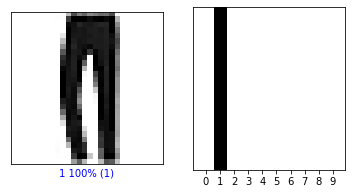

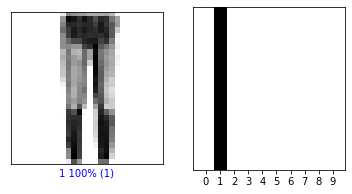

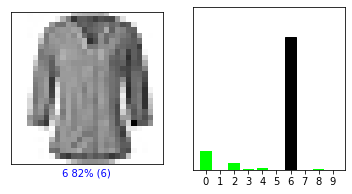

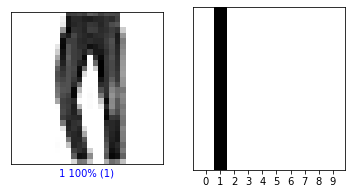

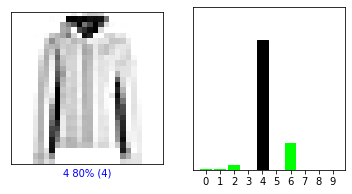

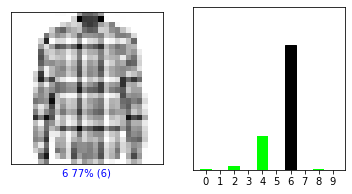

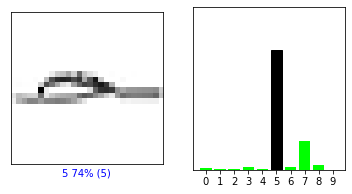

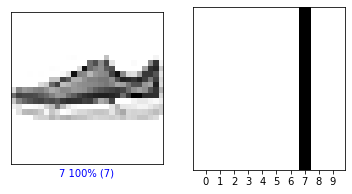

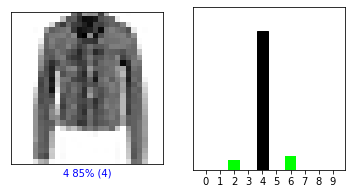

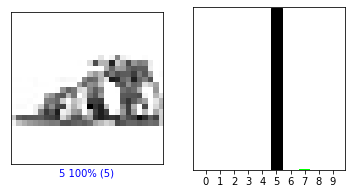

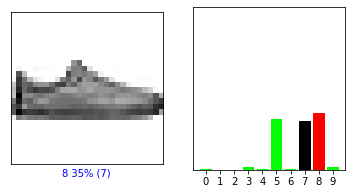

In [42]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions2[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions2[j], test_labels)
  plt.show()

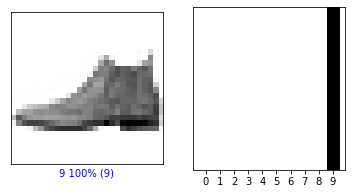

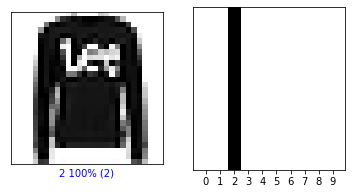

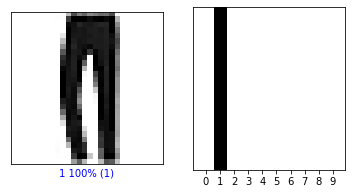

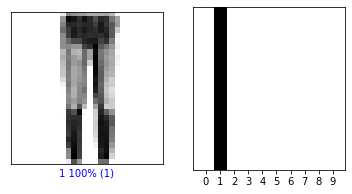

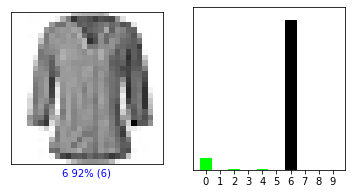

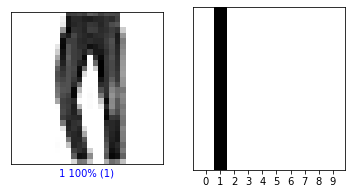

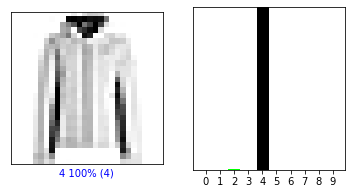

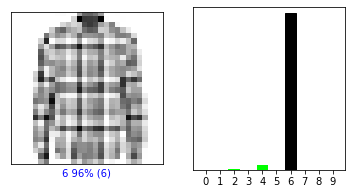

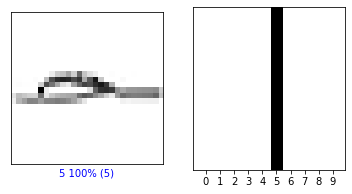

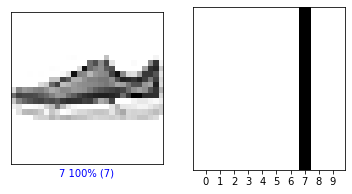

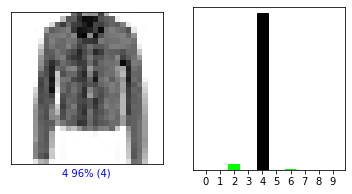

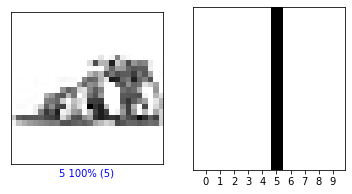

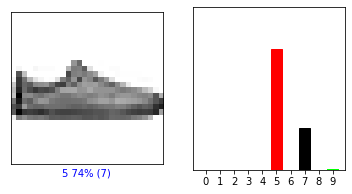

In [43]:
for j in range (0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions3[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions3[j], test_labels)
  plt.show()

Observando la prediccion de los 3 modelos acerca de la imagen de test [5] correspondiente a un pantalón vemos como los 3 modelos se comportan de igual manera ya que todos predicen que la imagen se corresponde a un pantalón al 100%

En cuanto a las predicciones de las 14 imágenes en los 3 modelos podemos ver que el modelo que mejor predice las imágenes es el modelo número 3 ya que casi en su totalidad predice los resultados correctamente con porcentajes muy cercanos al 100%, mientras que los otros dos modelos predicen bien la mayoría de las imágenes pero de forma menos segura.

A pesar de esto se ve que la imagen de test [13] no la predice bien ninguno de los 3 modelos realizados.

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [47]:
from keras.utils.np_utils import to_categorical
one_hot_test_labels=to_categorical(test_labels)

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


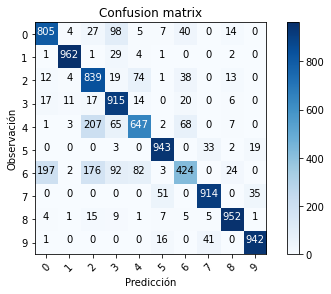

In [48]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


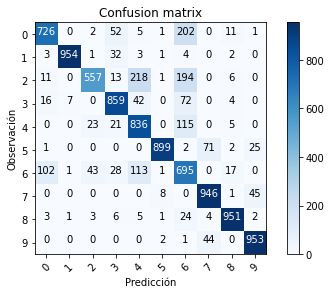

In [51]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions2, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


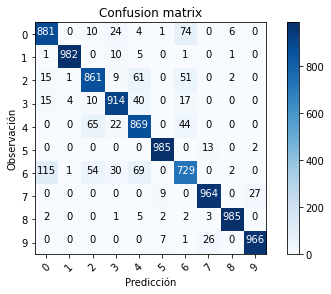

In [52]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions3, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

#COCEPTOS DE BATCH_NORMALIZATION Y DROPOUT

**Batch_normalization**

- Concepto 

    El "batch_normalization", como su nombre indica, normaliza los lotes de datos, de manera que la media de salida de cada lote de los datos estará alrededor del cero y desviacióne estándar cerca de 1. La media y la desviación estándar de cada variable se actualizan para cada minilote y se mantiene un promedio en ejecución.
    
    Sin embargo, no actúa igual que cuando lo hacíamos de manera "manual", puesto que normalizabamos los datos de entrenamiento y los de test por separado, para no contaminar los datos de test en función de los de entrenamiento. Sin embargo, esta función utiliza la media y la desviación estándar de los lotes de entrenamiento para normalizar la salida de los datos de test.  

    Esto implica que solo normalizará los datos de test cuando haya utilizado datos de entrenamiento con estadísticas similares.

    Como los datos de test están influidos por los de entrenamiento, la precisión será menor y nuestro modelo no será óptimo. 

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el batch_normalization en el modelo 1:


Antes de crear la red, volvemos a importar los datos porque los anteriores ya están normalizados.

In [53]:
(train_imagesBN, train_labelsBN), (test_imagesBN, test_labelsBN) = tf.keras.datasets.fashion_mnist.load_data()
assert train_imagesBN.shape == (60000,28,28)
assert test_imagesBN.shape == (10000,28,28)
assert train_labelsBN.shape == (60000,)
assert test_labelsBN.shape == (10000,)

Importamos la librería.

In [54]:
from keras.layers import BatchNormalization

Creamos la red como anteriormente y añadimos la capa de normalización.

In [55]:
modelBN = Sequential()
modelBN.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelBN.add(MaxPooling2D((2, 2)))

modelBN.add(Flatten())
modelBN.add(BatchNormalization())
modelBN.add(Dense(10, activation='softmax'))
modelBN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)            

In [56]:
modelBN.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [57]:
historyBN=modelBN.fit(train_imagesBN, train_labelsBN,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5110 - accuracy: 0.8197 - val_loss: 0.4151 - val_accuracy: 0.8547
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3691 - accuracy: 0.8699 - val_loss: 0.3730 - val_accuracy: 0.8709
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3250 - accuracy: 0.8862 - val_loss: 0.3461 - val_accuracy: 0.8809
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.2981 - accuracy: 0.8960 - val_loss: 0.3330 - val_accuracy: 0.8845
Epoch 5/5
960/960 [==============================] - 4s 4ms/step - loss: 0.2804 - accuracy: 0.9026 - val_loss: 0.3151 - val_accuracy: 0.8928


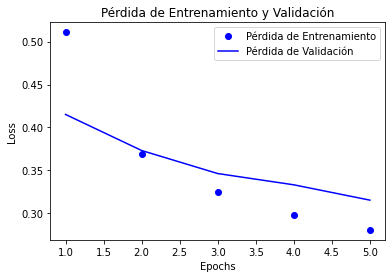

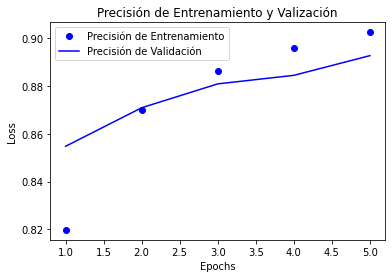

In [77]:
pinta_perdida_entrenamiento_validacion(historyBN)
pinta_precision_entrenamiento_validacion(historyBN)

Vemos que la precisión es del 89,61% frente al 85,20% del caso 1, muy similar aunque esta sea un poco más precisa. Podemos asumir con esto que los datos de test son muy similares a los datos de entrenamiento. 

**Dropout**

- Concepto 

    Cada cierto numero de datos introduce uno de ellos con valor 0, siendo su aportación nula y en la cual los pesos no varían tras su paso. De esta manera, el dropout permite que los pesos no se ajusten demasiado, y por lo tanto evitar el sobreajuste que empeore el modelo. 

    El hecho de que neuronas al azar no intervengan durante el entrenamiento impica que otras neuronas deben actuar para las predicciones de las neuronas que el Dropout ha eliminado. Se cree que esto da lugar a que la red aprenda múltiples representaciones internas independientes.
    
    La consecuencia es que la red pierde sensiblidad a los pesos de las neuronas, por lo que la red obtiene una generalización mejor y la probablidad del sobreentrenamiento es menor.

- Aplicación al modelo 1

    Veamos que ocurre si empleamos el dropout en el modelo 1:


A diferencia del bacth_normalization, nos sirven los datos importados al principio de la práctica, por lo que nos ahorramos el volver a importamos. 

Importamos la librería y creamos la red de neuronas:

In [58]:
from keras.layers import Dropout

 Elegimos una tasa de dropout del 20 %, lo que significa que una de cada cinco entradas se excluirá al azar de cada ciclo de actualización.

In [59]:
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelD.add(MaxPooling2D((2, 2)))
modelD.add(Dropout(0.2))

modelD.add(Flatten())
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

In [60]:
modelD.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [61]:
historyD=modelD.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 1.0699 - accuracy: 0.6303 - val_loss: 0.6448 - val_accuracy: 0.7642
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.6288 - accuracy: 0.7708 - val_loss: 0.5460 - val_accuracy: 0.8033
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5521 - accuracy: 0.8002 - val_loss: 0.4937 - val_accuracy: 0.8203
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5122 - accuracy: 0.8150 - val_loss: 0.4758 - val_accuracy: 0.8311
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4832 - accuracy: 0.8263 - val_loss: 0.4495 - val_accuracy: 0.8420


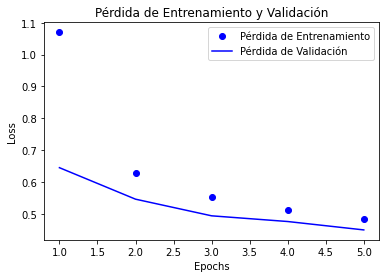

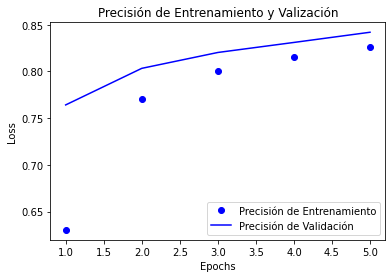

In [78]:
pinta_perdida_entrenamiento_validacion(historyD)
pinta_precision_entrenamiento_validacion(historyD)

Vemos que la precisión es del 85,40% frente al 85,20% del caso 1, muy similar aunque esta sea un 0.2% más precisa.

# CONCEPTO DE CALLBACKS

- Concepto

    Una Callback reúne varias funciones que se aplicarán en determinadas etapas de los datos de entrenamiento. Se emplean para obtener las estadísticas del modelo durante el entrenamiento. 
    Defines y usas las callbacks cuando quieres automatizar algunas tareas después de cada entrenamiento que te ayudan a controlar sobre el proceso de entrenamiento. Un ejemplo sería detener el entrenamiento cuando alcanza una cierta puntuación de precisión o de pérdida o ajustar las tasas de aprendizaje a lo largo del tiempo. Veamos algunos ejemplos: 

    - **EarlyStopping**, que para el entrenamiento si no hay cambios hacia val_loss después de las épocas que se desee y mantiene los mejores pesos una vez que se detiene el entrenamiento.

    - **ModelCheckpoint**, que guarda el modelo después de cada epoch. 

    - **LearningRateScheduler.** Ajusta la tasa de aprendizaje a lo largo del tiempo usando un horario que ya escribes de antemano. Esta función devuelve la tasa de aprendizaje deseada basada en la epoch que se marca de entrada.

    - **BaseLogger.** Callback que acumula las medias de cada época. Esta callback se aplica automáticamente a todos los modelos de Keras.


- Aplicación al modelo 1

    Veamos que ocurre si empleamos estas funciones en el modelo 1:

**EarlyStopping**

Importamos la libreria y creamos la red

In [62]:
from keras.callbacks import EarlyStopping

In [63]:
modelES = Sequential()
modelES.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelES.add(MaxPooling2D((2, 2)))

modelES.add(Flatten())
modelES.add(Dense(10, activation='softmax'))
modelES.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [64]:
modelES.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos que pare cuando no haya variación de pérdida durante 3 épocas

In [65]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

In [66]:
historyES=modelES.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2, callbacks=[callback])

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0134 - accuracy: 0.6503 - val_loss: 0.6427 - val_accuracy: 0.7617
Epoch 2/25
960/960 [==============================] - 4s 4ms/step - loss: 0.6003 - accuracy: 0.7798 - val_loss: 0.5866 - val_accuracy: 0.7813
Epoch 3/25
960/960 [==============================] - 4s 4ms/step - loss: 0.5207 - accuracy: 0.8147 - val_loss: 0.5152 - val_accuracy: 0.8149
Epoch 4/25
960/960 [==============================] - 4s 4ms/step - loss: 0.4769 - accuracy: 0.8301 - val_loss: 0.4609 - val_accuracy: 0.8390
Epoch 5/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4473 - accuracy: 0.8400 - val_loss: 0.4476 - val_accuracy: 0.8428
Epoch 6/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4228 - accuracy: 0.8512 - val_loss: 0.4205 - val_accuracy: 0.8540
Epoch 7/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4066 - accuracy: 0.8570 - val_loss: 0.4210 - val_accuracy: 0.8506
Epoch 

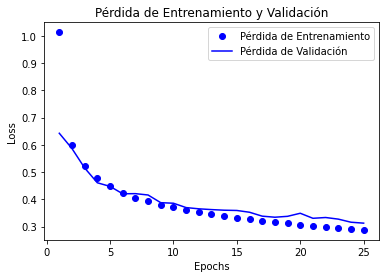

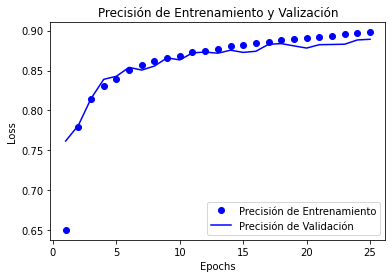

In [79]:
pinta_perdida_entrenamiento_validacion(historyES)
pinta_precision_entrenamiento_validacion(historyES)

Vemos que no se produce una parada en las épocas porque no hay ninguna época donde la pérdida se mantenga constante durante 3 seguidas. 

**ModelCheckpoint**

Importamos la libreria y creamos la red

In [80]:
from keras.callbacks import ModelCheckpoint

In [81]:
modelCP = Sequential()
modelCP.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelCP.add(MaxPooling2D((2, 2)))

modelCP.add(Flatten())
modelCP.add(Dense(10, activation='softmax'))
modelCP.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [69]:
modelCP.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

Definimos el ckeckpoint:

In [70]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [71]:
historyCP=modelCP.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 1.0300 - accuracy: 0.6464 - val_loss: 0.6603 - val_accuracy: 0.7516
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.6106 - accuracy: 0.7782 - val_loss: 0.5675 - val_accuracy: 0.7876
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5330 - accuracy: 0.8078 - val_loss: 0.5008 - val_accuracy: 0.8205
Epoch 4/5
960/960 [==============================] - 4s 4ms/step - loss: 0.4848 - accuracy: 0.8280 - val_loss: 0.4767 - val_accuracy: 0.8342
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4545 - accuracy: 0.8387 - val_loss: 0.4475 - val_accuracy: 0.8430


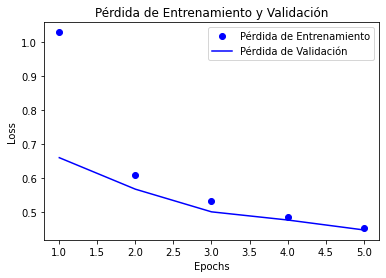

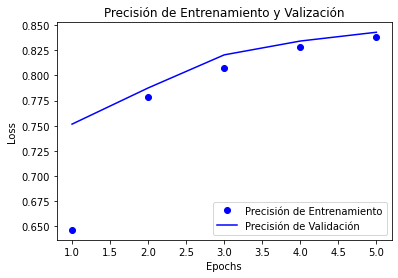

In [82]:
pinta_perdida_entrenamiento_validacion(historyCP)
pinta_precision_entrenamiento_validacion(historyCP)

**LearningRateScheduler**

Importamos la libería y realizamos los mismos pasos que con las dos anteriores: 

In [72]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [73]:
modelLR = Sequential()
modelLR.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
modelLR.add(MaxPooling2D((2, 2)))

modelLR.add(Flatten())
modelLR.add(Dense(10, activation='softmax'))
modelLR.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 10)              

In [74]:
modelLR.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [75]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [76]:
historyLR=modelLR.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2, callbacks=LearningRateScheduler(step_decay))

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.6246 - accuracy: 0.7722 - val_loss: 0.4362 - val_accuracy: 0.8471 - lr: 0.1000
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3985 - accuracy: 0.8555 - val_loss: 0.3785 - val_accuracy: 0.8652 - lr: 0.1000
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.3473 - accuracy: 0.8745 - val_loss: 0.3339 - val_accuracy: 0.8796 - lr: 0.1000
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.3172 - accuracy: 0.8862 - val_loss: 0.3177 - val_accuracy: 0.8843 - lr: 0.1000
Epoch 5/5
960/960 [==============================] - 4s 4ms/step - loss: 0.2947 - accuracy: 0.8942 - val_loss: 0.3116 - val_accuracy: 0.8885 - lr: 0.1000


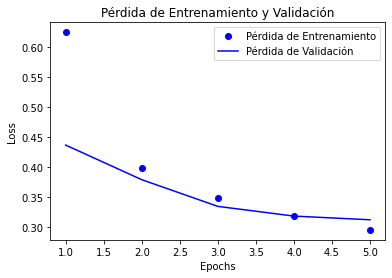

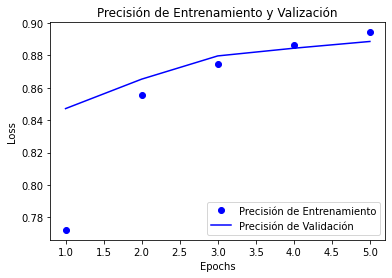

In [83]:
pinta_perdida_entrenamiento_validacion(historyLR)
pinta_precision_entrenamiento_validacion(historyLR)

# CONCLUSIONES FINALES Y COMPARACIÖN CON RESULTADOS OBTENIDOS EN LA PRÁCTICA 1

dd